<h1
    style=
        "
            font-family:'CMU Serif', serif;
            font-size:28px;
            font-weight: bold;
        "
>
    Etheria Luminis: The Stellar Path of Light
</h1>
<h2
    style=
        "
            font-family:'CMU Serif', serif;
            font-size:24px;
            font-style: italic;
            text-decoration: underline;
        "
>
    Aria Argenta Silva Castañeda
</h2>
<p
    style=
        "
            font-family:'CMU Serif', serif;
            font-size:22px;
        "
>
    Initial exploration of Gaia DR3 data, focusing on stellar properties such as positions, distances, and luminosities.
</p>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astroquery.gaia import Gaia
from astropy.table import Table

In [17]:
# Query to get stellar data within 100 parsecs, focusing on bright stars
stellar_data_query = """
SELECT TOP 1000
    source_id, ra, dec, parallax, pmra, pmdec, radial_velocity, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE parallax > 10 -- This limits the distance in parsecs
AND phot_g_mean_mag < 15 -- Limits the sample to relatively bright stars
"""

In [18]:
# Fetch the data
gaia_job = Gaia.launch_job(stellar_data_query)
stellar_data_results = gaia_job.get_results()

In [19]:
# Convert the results into a Pandas DataFrame
stellar_data_df = stellar_data_results.to_pandas()

stellar_data_df.head()

,SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag
0,418551920284673408,10.127242,56.537189,14.090976,49.125646,-31.595374,NaN,1.942524
1,4357027756659697664,243.586211,-3.694968,20.411292,-45.340019,-144.432722,NaN,2.016425
2,4993479684438433792,6.572156,-42.307820,39.918258,176.268293,-398.872135,NaN,2.089978
3,4038055447778237312,274.406090,-36.762429,23.885852,-131.804070,-166.308930,NaN,2.116495
4,1279798794197267072,221.246486,27.074316,13.826673,-50.818256,21.023521,NaN,2.183352


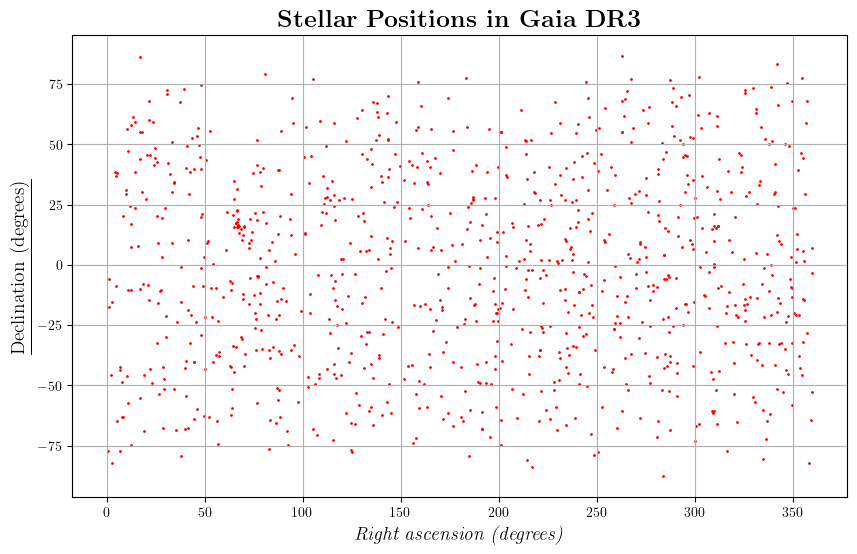

In [48]:
# Data exploration and visualization of the stars in 2D (Right Ascension vs Declination)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10, 6))
plt.scatter(stellar_data_df['ra'], stellar_data_df['dec'], s=1, color='red')
plt.title(r'\textbf{Stellar Positions in Gaia DR3}', fontsize=18)
plt.xlabel(r'\textit{Right ascension (degrees)}', fontsize=14)
plt.ylabel(r'\underline{Declination (degrees)}', fontsize=14)
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    Spatial distribution of the stars observed in the Gaia DR3 catalogue, represented in Right Ascension and Declination coordinates. There does not seem to be a clear concentration of stars in a specific region, suggesting a homogeneous distribution in the study area.
</p>

In [49]:

# Approximate distances from the parallax. Distance in parsecs = 1 / parallax (in arcseconds)
stellar_data_df[ 'distance_parsecs' ] = 1 / ( stellar_data_df[ 'parallax' ] / 1000 )

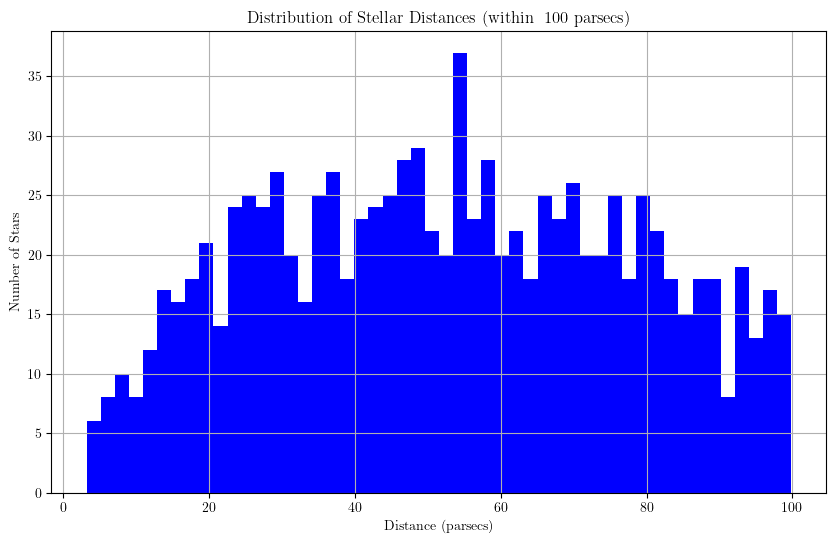

In [50]:
# Histogram of distances
plt.figure(figsize=(10, 6))
plt.hist(stellar_data_df['distance_parsecs'], bins=50, color='blue')
plt.title('Distribution of Stellar Distances (within ~100 parsecs)')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Number of Stars')
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    Distribution of stars according to their distance, limited to a radius of 100 parsecs. It can be observed that most of the stars are located within a range of 30 to 70 parsecs.
</p>

In [93]:
# Data normalization
from sklearn.preprocessing import StandardScaler


features_to_cluster = stellar_data_df[['parallax', 'pmra', 'pmdec', 'radial_velocity', 'phot_g_mean_mag']]
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_to_cluster)
normalized_stellar_data_df = pd.DataFrame(normalized_features, columns=features_to_cluster.columns)

normalized_stellar_data_df.head()

,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag
0,-0.486915,0.082058,0.044920,NaN,-3.383045
1,-0.270325,-0.209191,-0.389198,NaN,-3.274912
2,0.398156,0.474054,-1.368102,NaN,-3.167291
3,-0.151256,-0.475770,-0.473363,NaN,-3.128490
4,-0.495972,-0.226081,0.247361,NaN,-3.030665


In [94]:
# Split the data into complete and incomplete datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


complete_data = stellar_data_df.dropna(subset=['radial_velocity'])
incomplete_data = stellar_data_df[stellar_data_df['radial_velocity'].isna()]

In [95]:
# Define features (X) and target (y)
X_complete = complete_data[['parallax', 'pmra', 'pmdec', 'phot_g_mean_mag']]
y_complete = complete_data['radial_velocity']

X_incomplete = incomplete_data[['parallax', 'pmra', 'pmdec', 'phot_g_mean_mag']]

In [96]:
# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, test_size=0.2, random_state=42)

In [97]:
# Train RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean squared error: {mse}")

Mean squared error: 962.0052138775545


In [100]:
# Impute the missing values using the trained model
incomplete_data['radial_velocity'] = model.predict(X_incomplete)

/tmp/ipykernel_99557/2299449992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_data['radial_velocity'] = model.predict(X_incomplete)


In [102]:
# Combine the datasets again
imputed_data = pd.concat([complete_data, incomplete_data]).sort_index()

print(imputed_data.head())

             SOURCE_ID          ra        dec   parallax        pmra  \
0   418551920284673408   10.127242  56.537189  14.090976   49.125646   
1  4357027756659697664  243.586211  -3.694968  20.411292  -45.340019   
2  4993479684438433792    6.572156 -42.307820  39.918258  176.268293   
3  4038055447778237312  274.406090 -36.762429  23.885852 -131.804070   
4  1279798794197267072  221.246486  27.074316  13.826673  -50.818256   

        pmdec  radial_velocity  phot_g_mean_mag  distance_parsecs  
0  -31.595374        -2.612137         1.942524         70.967404  
1 -144.432722         2.912590         2.016425         48.992488  
2 -398.872135         1.414247         2.089978         25.051193  
3 -166.308930        11.584053         2.116495         41.865787  
4   21.023521         2.912602         2.183352         72.323980  


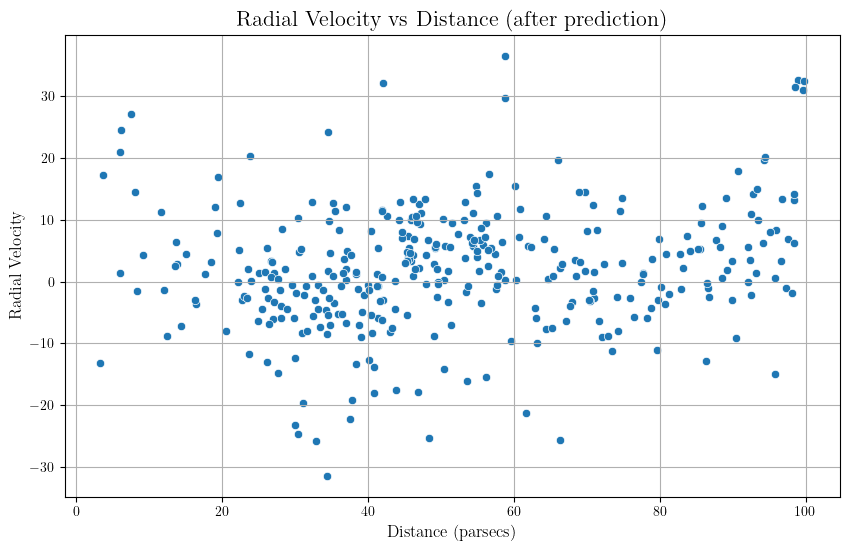

In [103]:
# Check if the predictions make sense in the context of distances
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_parsecs', y='radial_velocity', data=incomplete_data)
plt.title('Radial Velocity vs Distance (after prediction)', fontsize=16)
plt.xlabel('Distance (parsecs)', fontsize=12)
plt.ylabel('Radial Velocity', fontsize=12)
plt.grid(True)
plt.show()

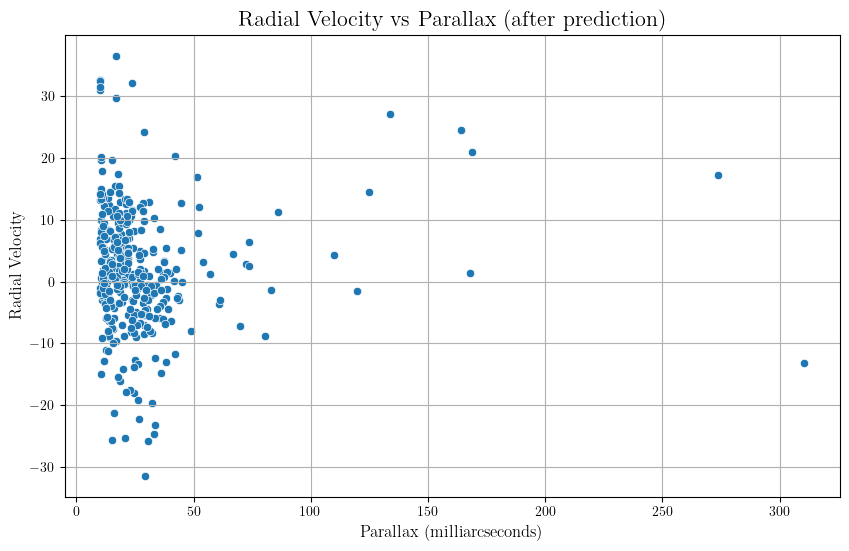

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='parallax', y='radial_velocity', data=incomplete_data)
plt.title('Radial Velocity vs Parallax (after prediction)', fontsize=16)
plt.xlabel('Parallax (milliarcseconds)', fontsize=12)
plt.ylabel('Radial Velocity', fontsize=12)
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    The data does not appear to exhibit a clear or consistent trend after analyze relationship between Radial Velocity vs Distance and Radial Velocity vs Parallax. Despite the successful predictions made by the Random Forest Regressor model, the scatter plots show a wide spread in the values, indicating that these variables may not have a straightforward relationship.
</p>

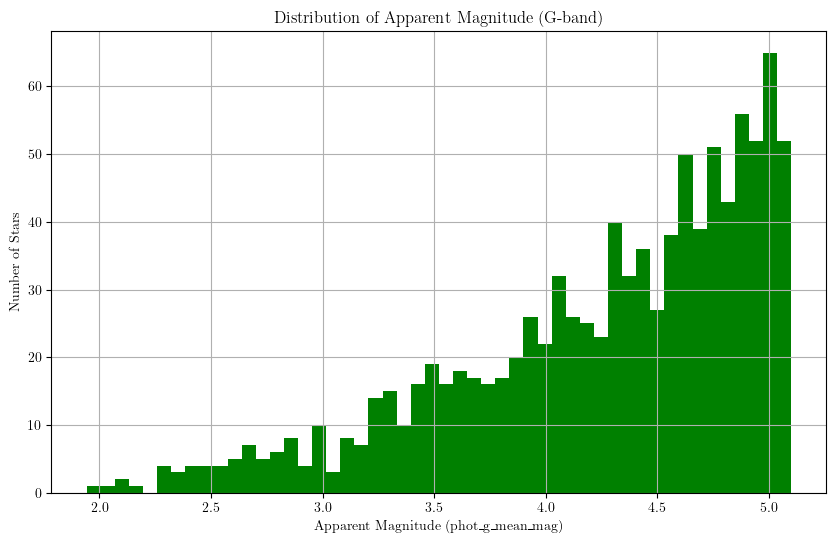

In [106]:
# Photometric properties analysis
# Histogram of apparent magnitude
plt.figure(figsize=(10, 6))
plt.hist(stellar_data_df['phot_g_mean_mag'], bins=50, color='green')
plt.title('Distribution of Apparent Magnitude (G-band)')
plt.xlabel('Apparent Magnitude (phot_g_mean_mag)')
plt.ylabel('Number of Stars')
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    Apparent magnitude distribution of the stars in the G-band. Most stars have a G-band magnitude between 4.0 and 5.0. This suggests that our sample predominantly consists of relatively faint stars in this magnitude range, further analyses of luminosity and distance relations could be impacted.
</p>

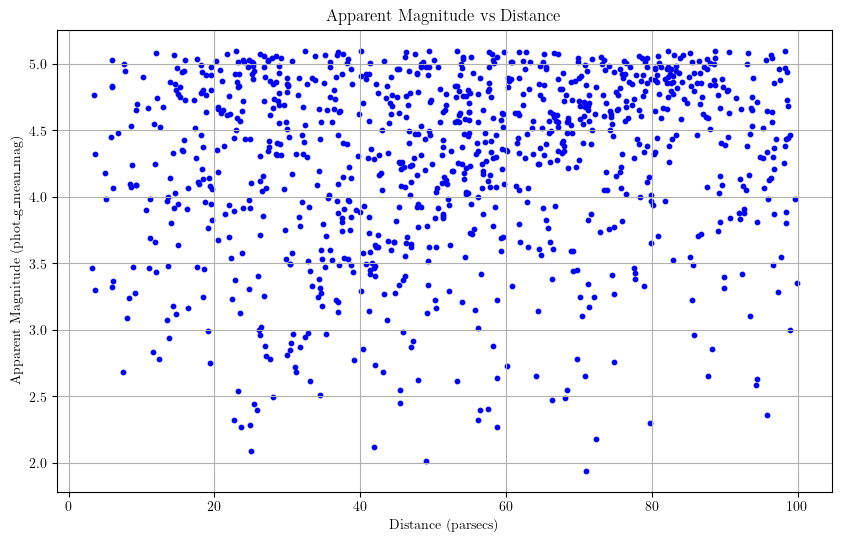

In [107]:
# Relationship between apparent magnitude and distance
plt.figure(figsize=(10, 6))
plt.scatter(stellar_data_df['distance_parsecs'], stellar_data_df['phot_g_mean_mag'], s=10, color='blue')
plt.title('Apparent Magnitude vs Distance')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Apparent Magnitude (phot_g_mean_mag)')
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    Although there is some variation in apparent magnitude as the distance increases, the apparent magnitude remains clustered between 4.0 and 5.0 across most distances. This could indicate a limit in our observational sensitivity or the sample size for more distant objects.
</p>

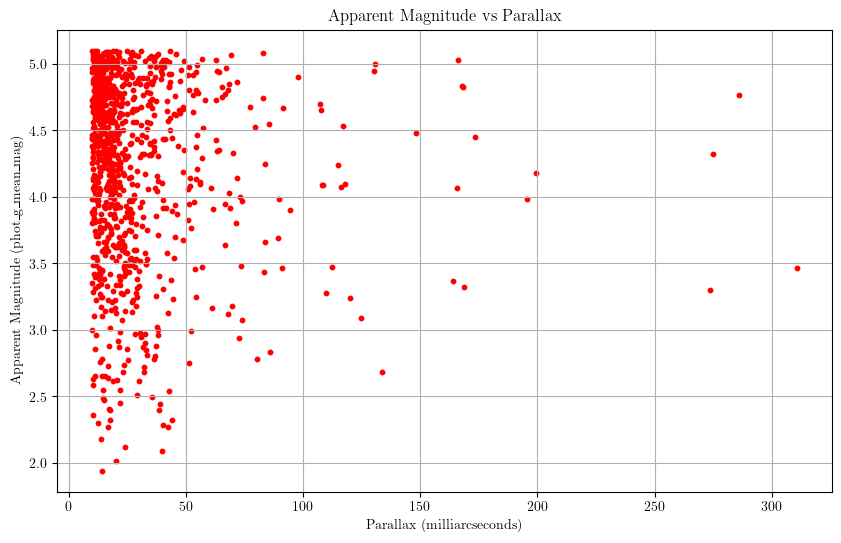

In [108]:
# Relationship between apparent magnitude and parallax
plt.figure(figsize=(10, 6))
plt.scatter(stellar_data_df['parallax'], stellar_data_df['phot_g_mean_mag'], s=10, color='red')
plt.title('Apparent Magnitude vs Parallax')
plt.xlabel('Parallax (milliarcseconds)')
plt.ylabel('Apparent Magnitude (phot_g_mean_mag)')
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    Most stars with small parallax values (indicating they are further away) tend to have a magnitude close to 5.0. Additionally, there is a sharp clustering around lower parallax values, with very few stars having large parallax values and fainter magnitudes. The apparent magnitude seems consistent for most stars in the dataset, particularly in the range between 4.0 and 5.0. There is little significant variation as a function of distance or parallax, which could reflect observational limitations or a lack of bright stars in the sample. It might be worth exploring how these photometric properties relate to intrinsic luminosity to obtain more meaningful insights.
</p>

$$ M = m - 5 \times \left( \log_{10}(d) - 1 \right) $$

<p
  style="
    font-family:'CMU Serif', serif;
    font-size:22px;
  "
>
  Where:
</p>
<ul
  style="font-family:'CMU Serif', serif;
  font-size:20px;
  "
>
  <li><b>(M)</b> is the absolute magnitude,</li>
  <li><b>(m)</b> is the apparent magnitude, and</li>
  <li><b>(d)</b> is the distance in parsecs.</li>
</ul>

In [112]:
# HR Diagram
stellar_data_df_clean['absolute_magnitude'] = (
    stellar_data_df_clean['phot_g_mean_mag'] - 
    5 * (np.log10(stellar_data_df_clean['distance_parsecs']) - 1)
)

/tmp/ipykernel_99557/3577395231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stellar_data_df_clean['absolute_magnitude'] = (


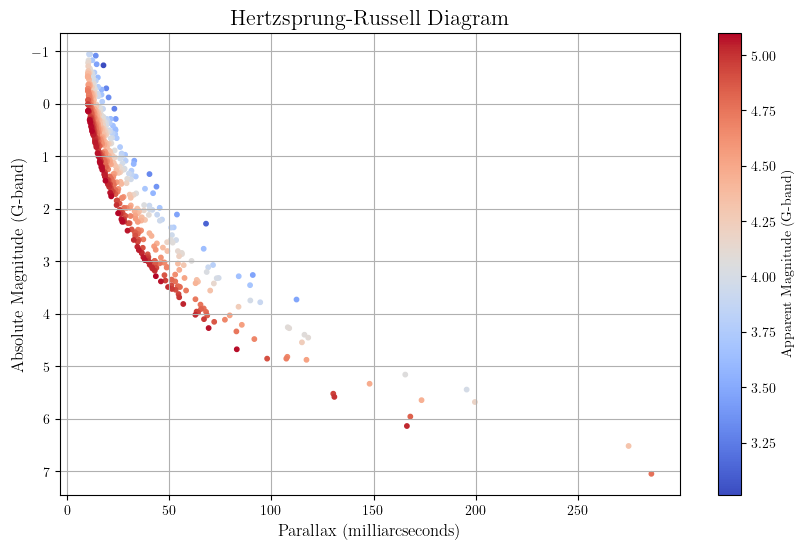

In [114]:
plt.figure(figsize=(10, 6))

plt.scatter(
    stellar_data_df_clean['parallax'], 
    stellar_data_df_clean['absolute_magnitude'], 
    c=stellar_data_df_clean['phot_g_mean_mag'], cmap='coolwarm', s=10
)

plt.colorbar(label='Apparent Magnitude (G-band)')
plt.gca().invert_yaxis()
plt.title('Hertzsprung-Russell Diagram', fontsize=16)
plt.xlabel('Parallax (milliarcseconds)', fontsize=12)
plt.ylabel('Absolute Magnitude (G-band)', fontsize=12)
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    The absolute magnitude of stars varies with their distance, but it is difficult to observe a clear correlation with parallax beyond the trend in the main sequence.
</p>

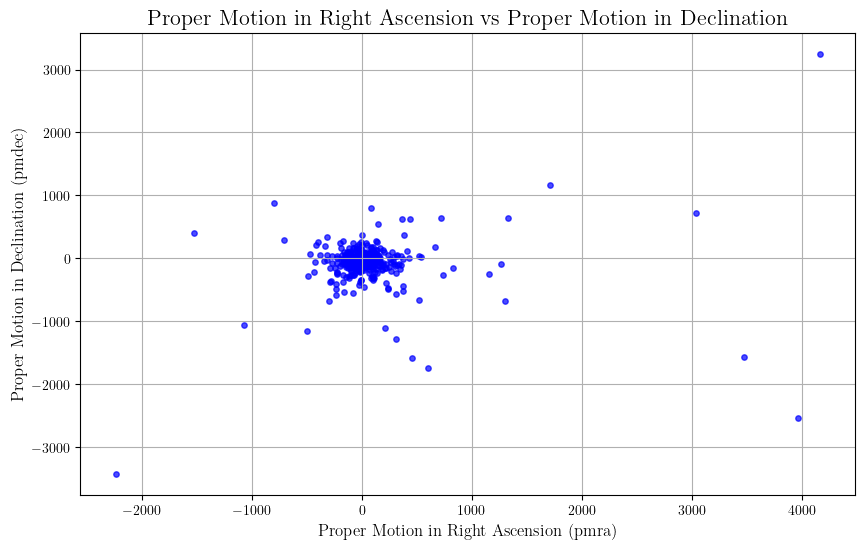

In [116]:
# Scatter plot for pmra vs pmdec
plt.figure(figsize=(10, 6))
plt.scatter(stellar_data_df_clean['pmra'], stellar_data_df_clean['pmdec'], color='blue', s=15, alpha=0.7)
plt.title('Proper Motion in Right Ascension vs Proper Motion in Declination', fontsize=16)
plt.xlabel('Proper Motion in Right Ascension (pmra)', fontsize=12)
plt.ylabel('Proper Motion in Declination (pmdec)', fontsize=12)
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    There does not appear to be a clear correlation between pmra and pmdec. The dispersion appears random, suggesting that the directions of motion in right ascension and declination are not obviously related to each other. There are several points that are very far from the main concentration, which could be noise in the data, measurement errors or stars with peculiar characteristics.
</p>

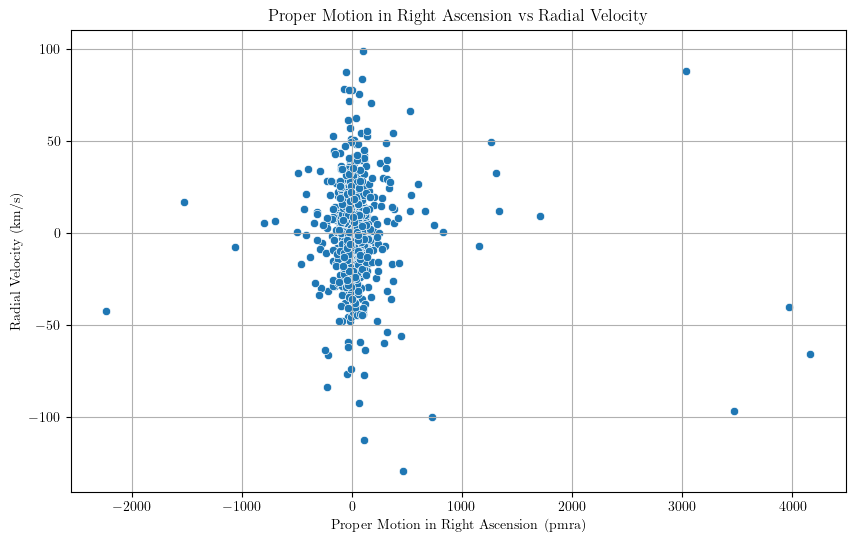

In [117]:
# Kinematic relationship between proper motion in right ascension and radial velocity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stellar_data_df_clean['pmra'], y=stellar_data_df_clean['radial_velocity'])
plt.title('Proper Motion in Right Ascension vs Radial Velocity')
plt.xlabel('Proper Motion in Right Ascension (pmra)')
plt.ylabel('Radial Velocity (km/s)')
plt.grid(True)
plt.show()

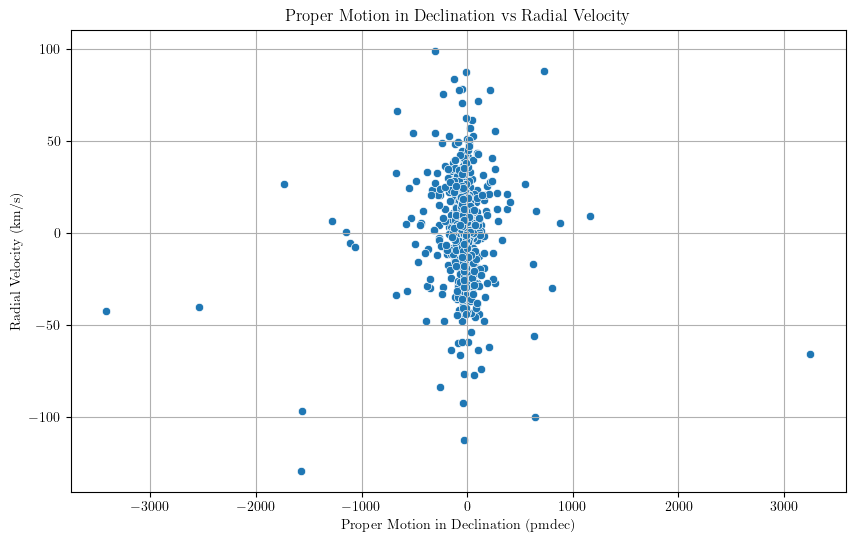

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stellar_data_df_clean['pmdec'], y=stellar_data_df_clean['radial_velocity'])
plt.title('Proper Motion in Declination vs Radial Velocity')
plt.xlabel('Proper Motion in Declination (pmdec)')
plt.ylabel('Radial Velocity (km/s)')
plt.grid(True)
plt.show()

<p
    style=
            "
                font-family:'CMU Serif', serif;
                font-size:22px;
            "
>
    Most stars exhibit proper motions close to zero in both right ascension and declination, as well as radial velocities that cluster near 0 km/s. This suggests that a significant portion of the stars in the dataset share similar kinematic behavior, likely due to their relative proximity or alignment with our solar system's movement. However, several outliers in the dataset display significantly higher values in proper motion and radial velocity. These stars do not conform to the overall pattern observed in the majority of the dataset. While the nature of these outliers remains unclear, they present a valuable area for further investigation, especially in relation to their kinematic behavior.
</p>